In [20]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(
    contact_points=['52.91.166.84'],
    auth_provider = auth_provider
)

session = cluster.connect('capstone')

[WARNING] Failed to create connection pool for new host 52.90.194.70:
Traceback (most recent call last):
  File "cassandra/cluster.py", line 1787, in cassandra.cluster.Session.add_or_renew_pool.run_add_or_renew_pool (cassandra/cluster.c:30488)
    new_pool = HostConnection(host, distance, self)
  File "cassandra/pool.py", line 295, in cassandra.pool.HostConnection.__init__ (cassandra/pool.c:6160)
    self._connection = session.cluster.connection_factory(host.address)
  File "cassandra/cluster.py", line 789, in cassandra.cluster.Cluster.connection_factory (cassandra/cluster.c:9245)
    return self.connection_class.factory(address, self.connect_timeout, *args, **kwargs)
  File "cassandra/connection.py", line 306, in cassandra.connection.Connection.factory (cassandra/connection.c:5139)
    conn = cls(host, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/cassandra/io/asyncorereactor.py", line 162, in __init__
    self._connect_socket()
  File "cassandra/connection.py", line

In [7]:
from cassandra.query import tuple_factory
session.row_factory = tuple_factory
rows = session.execute("SELECT code, popularity FROM airportpopularity LIMIT 1000000")
import graphlab
s = sorted(rows, key=lambda k: k[1], reverse=True)
#print s
sframe = graphlab.SFrame({'touple': s})
sframe['popularity'] = sframe['touple'].apply(lambda x: x[1])
sframe = sframe.add_row_number()
sframe['rank'] = sframe['id'].apply(lambda x: x+1)

sframe

[INFO] 1454680666 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /usr/local/lib/python2.7/dist-packages/certifi/cacert.pem
1454680666 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to kgrodzicki@gmail.com and will expire on October 14, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-51 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1454680666.log
[INFO] GraphLab Server Version: 1.7.1


id,touple,popularity,rank
0,"[ATL, 58187766]",58187766,1
1,"[DEN, 31219499]",31219499,2
2,"[LAX, 25452018]",25452018,3
3,"[CLT, 24276984]",24276984,4
4,"[PHX, 21864094]",21864094,5
5,"[SFO, 18537961]",18537961,6
6,"[SLC, 16124346]",16124346,7
7,"[SEA, 16069711]",16069711,8
8,"[LAS, 15947830]",15947830,9
9,"[BOS, 13285805]",13285805,10


[WARNING] Error attempting to reconnect to 172.31.59.248, scheduling retry in 8.0 seconds: [Errno None] Tried connecting to [('172.31.59.248', 9042)]. Last error: timed out
[WARNING] Error attempting to reconnect to 172.31.59.247, scheduling retry in 8.0 seconds: [Errno None] Tried connecting to [('172.31.59.247', 9042)]. Last error: timed out
[WARNING] Error attempting to reconnect to 172.31.59.248, scheduling retry in 256.0 seconds: [Errno None] Tried connecting to [('172.31.59.248', 9042)]. Last error: timed out
[WARNING] Error attempting to reconnect to 172.31.59.247, scheduling retry in 256.0 seconds: [Errno None] Tried connecting to [('172.31.59.247', 9042)]. Last error: timed out
[WARNING] Error attempting to reconnect to 172.31.59.248, scheduling retry in 16.0 seconds: [Errno None] Tried connecting to [('172.31.59.248', 9042)]. Last error: timed out
[WARNING] Error attempting to reconnect to 172.31.59.247, scheduling retry in 16.0 seconds: [Errno None] Tried connecting to [('17

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

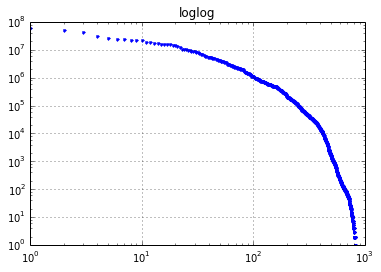

In [11]:
plt.loglog(sframe['rank'],sframe['popularity'],'.')
plt.grid(True)
plt.title('loglog')

# Power Law Distribution